<a href="https://colab.research.google.com/github/hhhursh/ADS-LABS/blob/main/ADS_Exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tabulate
import numpy as np
import pandas as pd
from sklearn import metrics
from tabulate import tabulate
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ads1.csv')
desc = df.describe()

cols = df.describe().columns.values.tolist()

In [ ]:
ans = [
    ['Col', 'Count', 'Min', 'Max', '25%', '50% / Median', '75%', 'Mean', 'Mode', 'Std', 'Var', 'Skew', 'Kurtosis']
]

for col in cols:
  temp = desc[col]
  l1 = [col, temp['count'], temp['min'], temp['max'], temp['25%'], temp['50%'], temp['75%'], temp['mean'], df[col].mode().tolist()[0], temp['std'], temp['std']**2, df[col].astype(float).skew(), df[col].astype(float).kurt()]
  ans.append(l1)

print(tabulate(ans, tablefmt="simple_grid"))

┌─────────────────────────────────┬───────┬─────┬─────┬─────┬──────────────┬─────┬────────────────────┬──────┬────────────────────┬────────────────────┬──────────────────────┬──────────────────────┐
│ Col                             │ Count │ Min │ Max │ 25% │ 50% / Median │ 75% │ Mean               │ Mode │ Std                │ Var                │ Skew                 │ Kurtosis             │
├─────────────────────────────────┼───────┼─────┼─────┼─────┼──────────────┼─────┼────────────────────┼──────┼────────────────────┼────────────────────┼──────────────────────┼──────────────────────┤
│ Java                            │ 41.0  │ 1.0 │ 5.0 │ 3.0 │ 3.0          │ 5.0 │ 3.5853658536585367 │ 3    │ 1.0948883449032043 │ 1.198780487804878  │ -0.1688158385759511  │ -0.76587333577955    │
├─────────────────────────────────┼───────┼─────┼─────┼─────┼──────────────┼─────┼────────────────────┼──────┼────────────────────┼────────────────────┼──────────────────────┼──────────────────────┤
│ Pyt

In [ ]:
data = pd.DataFrame(ans)
new_header = data.iloc[0]
data = data[1:]
data.columns = new_header

data = data.set_index('Col')
data = data.loc[['Java', 'Python', 'DSA', 'OS', 'DBMS', 'Communication skills', 'Presentation skills', 'Creativity', 'Singing', 'Dance']]
data

,Count,Min,Max,25%,50% / Median,75%,Mean,Mode,Std,Var,Skew,Kurtosis
Col,,,,,,,,,,,,
Java,41.0,1.0,5.0,3.0,3.0,5.0,3.585366,3,1.094888,1.19878,-0.168816,-0.765873
Python,41.0,1.0,5.0,3.0,4.0,4.0,3.536585,4,1.163992,1.354878,-0.392885,-0.650371
DSA,41.0,2.0,5.0,3.0,3.0,5.0,3.512195,3,1.098225,1.206098,0.146035,-1.298653
OS,41.0,1.0,5.0,3.0,3.0,4.0,3.146341,3,0.988963,0.978049,0.344974,-0.216655
DBMS,41.0,2.0,5.0,3.0,4.0,5.0,3.731707,3,0.975305,0.95122,-0.101521,-1.03943
Communication skills,41.0,2.0,5.0,4.0,4.0,5.0,4.0,4,0.894427,0.8,-0.661145,-0.152454
Presentation skills,41.0,2.0,5.0,3.0,4.0,5.0,3.95122,3,0.893063,0.797561,-0.122748,-1.279995
Creativity,41.0,2.0,5.0,3.0,4.0,4.0,3.780488,4,0.880687,0.77561,-0.466935,-0.279805
Singing,41.0,1.0,5.0,1.0,2.0,3.0,2.365854,1,1.409895,1.987805,0.766376,-0.615729


In [ ]:
columns_of_interest = list(data.sort_values('Mean', ascending=False).head(5).index)
data.sort_values('Mean', ascending=False).head(5)

,Count,Min,Max,25%,50% / Median,75%,Mean,Mode,Std,Var,Skew,Kurtosis
Col,,,,,,,,,,,,
Communication skills,41.0,2.0,5.0,4.0,4.0,5.0,4.0,4,0.894427,0.8,-0.661145,-0.152454
Presentation skills,41.0,2.0,5.0,3.0,4.0,5.0,3.95122,3,0.893063,0.797561,-0.122748,-1.279995
Creativity,41.0,2.0,5.0,3.0,4.0,4.0,3.780488,4,0.880687,0.77561,-0.466935,-0.279805
DBMS,41.0,2.0,5.0,3.0,4.0,5.0,3.731707,3,0.975305,0.95122,-0.101521,-1.03943
Java,41.0,1.0,5.0,3.0,3.0,5.0,3.585366,3,1.094888,1.19878,-0.168816,-0.765873


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df_top5 = df[columns_of_interest]
df_top5['Mean'] = df_top5.mean(axis=1)

x = df_top5[columns_of_interest]
y = df_top5['Mean']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  3.1086244689504383e-15
Coefficients:


<ipython-input-119-c72c7ff6f0d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['Mean'] = df_top5.mean(axis=1)


[('Communication skills', 0.19999999999999957),
 ('Presentation skills', 0.20000000000000007),
 ('Creativity', 0.19999999999999976),
 ('DBMS', 0.19999999999999987),
 ('Java', 0.19999999999999987)]

In [ ]:
y_pred_mlr= mlr.predict(x_test)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 4.099285014000578e-16
Mean Square Error: 3.337488445165819e-31
Root Mean Square Error: 5.777100003605459e-16


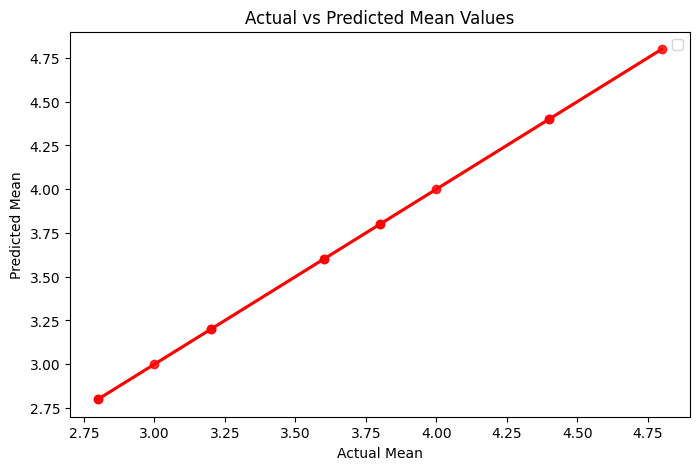

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test,y=y_pred_mlr,ci=None,color ='red')
plt.title('Actual vs Predicted Mean Values')
plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.legend()
plt.show()
